In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('daphne.csv', sep='\t', encoding='utf-16')

# Lets plot Daphne's activity over time

So first we need to import matplotlib

In [52]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

Let's look at the data file first

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
Unnamed: 0    134 non-null int64
Date_1        134 non-null int64
Date_2        134 non-null int64
Date_3        134 non-null object
ID_page       134 non-null int64
ID_post       134 non-null int64
Link          134 non-null object
Title         134 non-null object
Txt           120 non-null object
dtypes: int64(5), object(4)
memory usage: 9.5+ KB


In [8]:
df.head()

,Unnamed: 0,Date_1,Date_2,Date_3,ID_page,ID_post,Link,Title,Txt
0,0,2017,10,"Monday, 16 October 2:09 pm",1,97964,https://daphnecaruanagalizia.com/2017/10/first...,First things first: do something about that ho...,You can wear the flashiest watch and keep your...
1,1,2017,10,"Sunday, 15 October 10:07 pm",1,97961,https://daphnecaruanagalizia.com/2017/10/austr...,Austria’s new chancellor is 31 – and will have...,"Exit polls show that Sebastian Kurz, 31, is ab..."
2,2,2017,10,"Sunday, 15 October 7:26 pm",1,97958,https://daphnecaruanagalizia.com/2017/10/party...,The party leaders and Sunday morning,Is it going to be a five-year electoral campai...
3,3,2017,10,"Saturday, 14 October 12:52 am",1,97955,https://daphnecaruanagalizia.com/2017/10/looks...,Looks like Delia is surrounding himself with l...,The disgraceful thing is that this man has bee...
4,4,2017,10,"Saturday, 14 October 12:26 am",1,97952,https://daphnecaruanagalizia.com/2017/10/chris...,Chris Cardona: a one-track mind,“I don’t recall any other budget having given ...


So lets turn Date_3 into an actual date, here are the [codes](http://strftime.org/).

First, lets bring the year date in. We need to clean Date_1 first though

In [14]:
def clean(elem):
    elem = str(elem).split('\n')[0].strip()
    return elem

In [16]:
df['Date_1'] = df['Date_1'].apply(clean)

In [18]:
df['Date'] = df['Date_3'] + " " + df['Date_1']

In [39]:
df['Final Date'] = pd.to_datetime(df['Date'], format='%A, %d %B %I:%S %p %Y')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2017-10-16 14:00:09 to 2017-09-15 10:00:53
Data columns (total 11 columns):
Unnamed: 0    134 non-null int64
Date_1        134 non-null object
Date_2        134 non-null int64
Date_3        134 non-null object
ID_page       134 non-null int64
ID_post       134 non-null int64
Link          134 non-null object
Title         134 non-null object
Txt           120 non-null object
Date          134 non-null object
Final Date    134 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 12.6+ KB


In [41]:
df.index = df['Final Date'].value

Let's just plot everything?

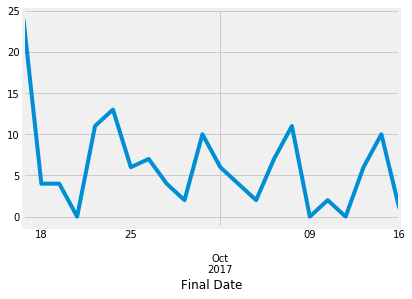

In [53]:
df.resample('B')['ID_page'].count().plot()

By week

In [69]:
df.groupby(df['Final Date'].dt.week)['ID_page'].count()

Final Date
37    24
38    32
39    29
40    30
41    18
42     1
Name: ID_page, dtype: int64

By hour of day

In [70]:
df.groupby(df['Final Date'].dt.hour)['ID_page'].count()

Final Date
0     14
1      9
2     10
3      3
4      1
9      1
10     9
11    11
12    13
13     3
14     7
15     1
16     3
17     3
18     8
19     8
20     4
21     9
22     7
23    10
Name: ID_page, dtype: int64

By week

In [72]:
df.groupby(df['Final Date'].dt.weekday)['ID_page'].count()

Final Date
0    17
1    17
2     6
3    26
4    26
5    20
6    22
Name: ID_page, dtype: int64